In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "./data/"

In [3]:
en_pw_base_d = pd.read_csv(path+"eex_power_base_d.csv", parse_dates=['date'])
en_pw_base_d.head(10)

,date,d00,d01,d02,d03,d04,d05,d06,d07,d08,d09,d10,d11,d12,d13,d14
0,2022-10-13,257.46,260.65,173.98,98.02,214.71,246.97,227.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-12,282.54,257.46,236.92,176.00,89.56,221.58,224.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-11,259.87,282.54,255.62,225.96,141.96,74.96,185.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-10,162.09,259.87,301.67,250.00,198.72,134.28,96.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-09,146.72,162.09,259.87,301.67,250.00,198.72,134.28,96.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-10-08,145.34,146.72,162.09,259.87,301.67,250.00,198.72,134.28,96.72,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-10-07,163.89,145.34,154.20,197.81,289.01,326.22,313.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-10-06,100.80,163.89,167.35,143.43,220.46,296.64,323.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-10-05,103.19,100.80,153.47,139.97,125.53,217.43,246.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-10-04,246.31,103.19,136.83,172.03,123.68,139.56,219.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#en_pw_peak_q = pd.read_csv(path+"eex_power_peak_q.csv", parse_dates=['date'])
#en_pw_peak_m = pd.read_csv(path+"eex_power_peak_m.csv", parse_dates=['date'])
#en_pw_peak_w = pd.read_csv(path+"eex_power_peak_w.csv", parse_dates=['date'])
#en_pw_peak_wkd = pd.read_csv(path+"eex_power_peak_wkd.csv", parse_dates=['date'])
#en_pw_peak_y = pd.read_csv(path+"eex_power_peak_y.csv", parse_dates=['date'])
en_pw_peak_d = pd.read_csv(path+"eex_power_peak_d.csv", parse_dates=['date'])
#spot_pw = pd.read_csv(path+"epex_spot_power.csv")

In [5]:
#

In [6]:
en_pw_base_d = en_pw_base_d.dropna(thresh=len(en_pw_base_d)*0.25, axis = "columns")
#en_pw_base_d.interpolate(method = 'time', inplace =True)
en_pw_base_d.fillna(method = "ffill", inplace =True)
en_pw_base_d.fillna(method = "bfill", inplace =True)

en_pw_base_d.head()

,date,d00,d01,d02,d03,d04,d05,d06,d07
0,2022-10-13,257.46,260.65,173.98,98.02,214.71,246.97,227.71,96.72
1,2022-10-12,282.54,257.46,236.92,176.00,89.56,221.58,224.39,96.72
2,2022-10-11,259.87,282.54,255.62,225.96,141.96,74.96,185.42,96.72
3,2022-10-10,162.09,259.87,301.67,250.00,198.72,134.28,96.72,96.72
4,2022-10-09,146.72,162.09,259.87,301.67,250.00,198.72,134.28,96.72


In [7]:
en_pw_base_d.isna().sum().sum()

0

In [8]:
en_pw_peak_d = en_pw_peak_d.dropna(thresh=len(en_pw_base_d)*0.25, axis = "columns")
#en_pw_base_d.interpolate(method = 'time', inplace =True)
en_pw_peak_d.fillna(method = "ffill", inplace =True)
en_pw_peak_d.fillna(method = "bfill", inplace =True)

en_pw_peak_d.head()

,date,d00,d01,d02,d03,d04,d05,d06
0,2022-10-13,287.57,283.84,174.35,83.13,237.57,271.00,246.47
1,2022-10-12,299.80,287.57,260.06,170.77,58.27,254.31,250.74
2,2022-10-11,291.78,299.80,279.08,247.24,152.65,70.91,226.39
3,2022-10-10,186.52,291.78,331.67,277.06,226.65,136.60,85.12
4,2022-10-09,131.05,186.52,291.78,331.67,277.06,226.65,136.60


In [9]:
en_pw_peak_d.isna().sum().sum()

0

# Data Visualization

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

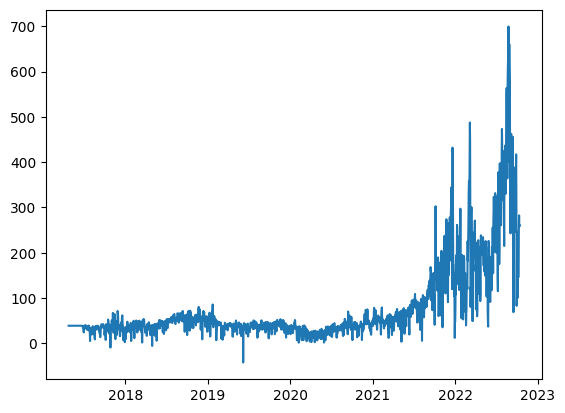

In [11]:
#fig = plt.figure(figsize = [15,10])
plt.plot(en_pw_base_d['date'], en_pw_base_d['d01'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

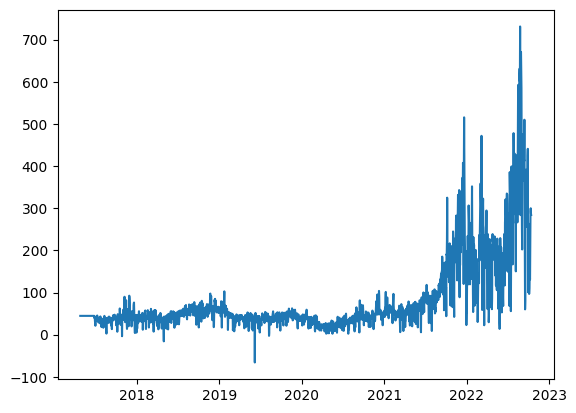

In [12]:
plt.plot(en_pw_peak_d['date'], en_pw_peak_d['d01'])
plt.show

In [13]:
en_pw_base_d.set_index("date", inplace = True)
en_pw_peak_d.set_index("date", inplace = True)

In [14]:
# New df with prices from May-2021 to mid-October 2022
df1 = en_pw_peak_d["2021-05-25" : "2022-10-15"]

<AxesSubplot: xlabel='date'>

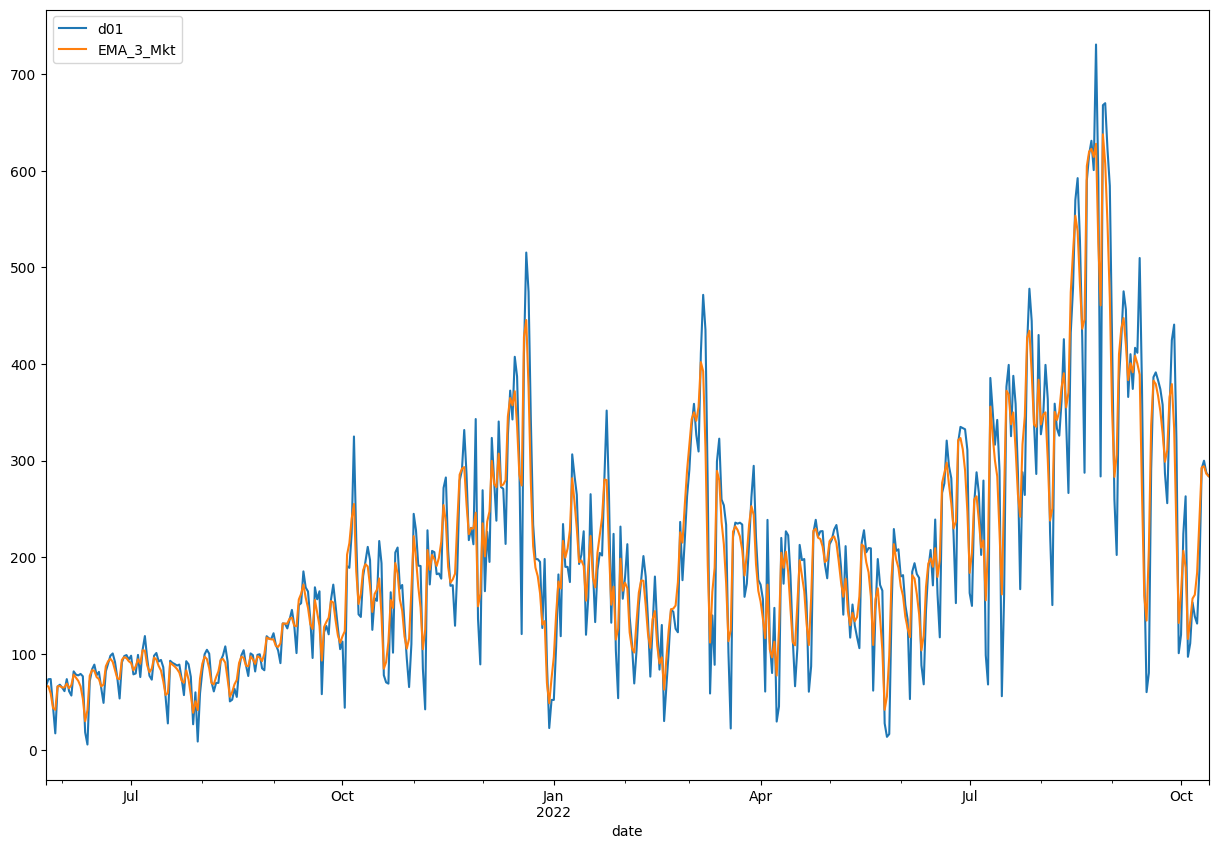

In [15]:
# Modifying df to have only d01 prices & converting series into dataframe
df1 = df1['d01'].to_frame()

#Calculating exponential moving average
df1['EMA_3_Mkt'] = df1['d01'].ewm(span=3).mean()

#Plotting the d01 prices with exponential moving average
df1[['d01', 'EMA_3_Mkt']].plot(label = 'df1', figsize = (15,10))

<AxesSubplot: xlabel='date'>

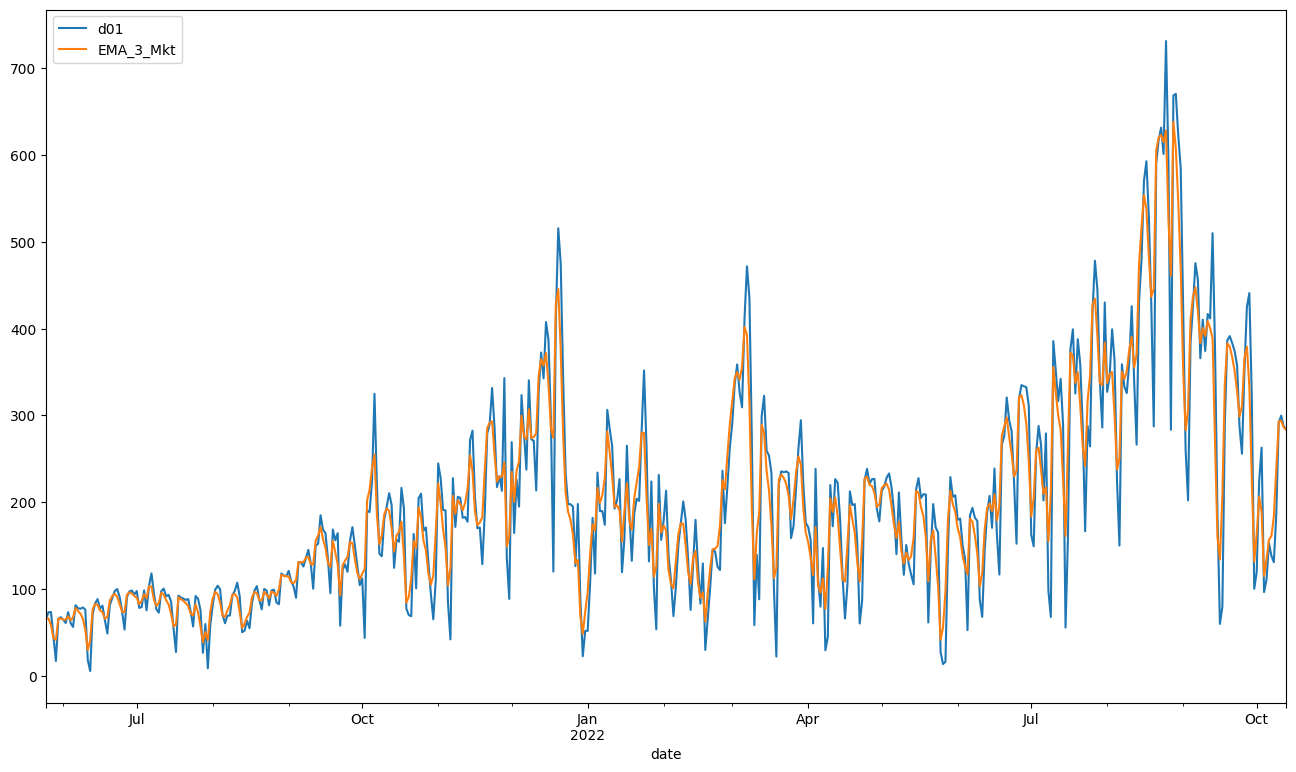

In [16]:
df1.plot(figsize=(16,9))

In [17]:
# Averaging on weekly basis
#df1['d01'].resample('W').mean().plot()

<AxesSubplot: xlabel='date'>

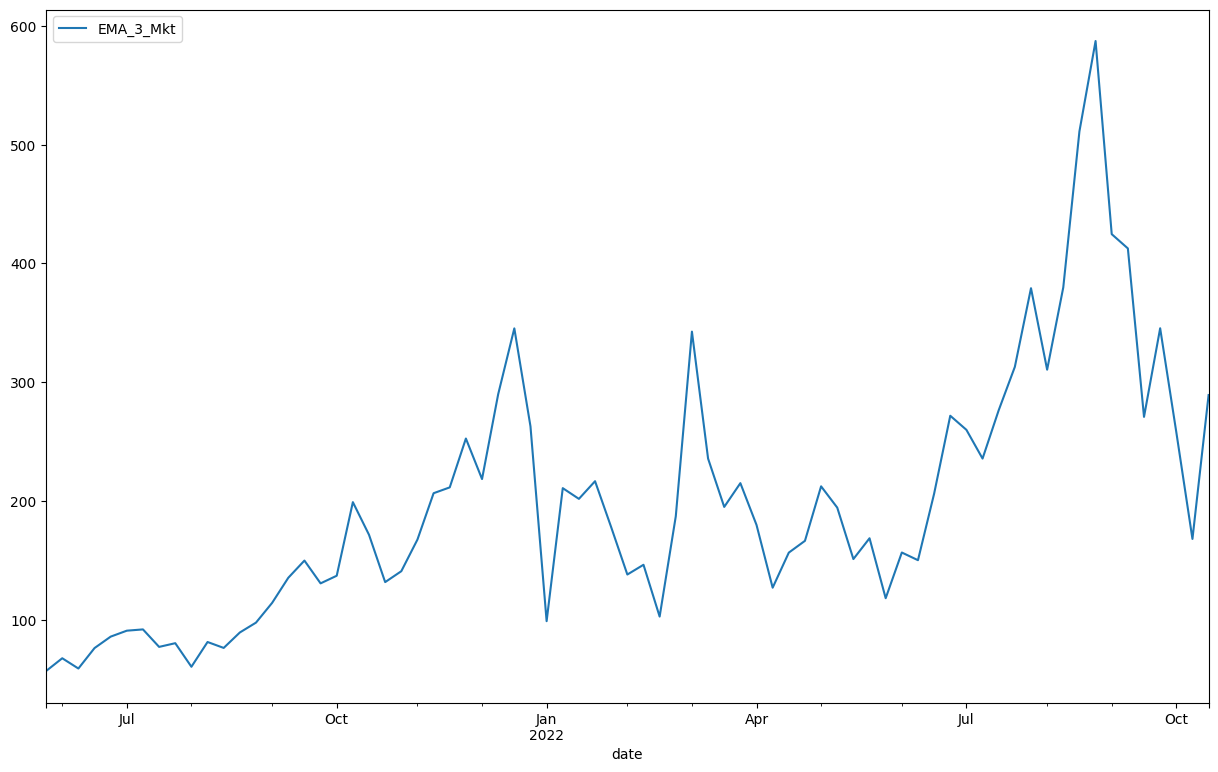

In [18]:
df2 = df1['EMA_3_Mkt'].resample('W').mean().to_frame()
df2.plot(figsize=(15,9))

In [19]:
df2.head()

,EMA_3_Mkt
date,
2021-05-30,57.072433
2021-06-06,67.818608
2021-06-13,59.177580
2021-06-20,76.387401
2021-06-27,86.008742


In [20]:
df2.tail()

,EMA_3_Mkt
date,
2022-09-18,270.895635
2022-09-25,345.419843
2022-10-02,258.034416
2022-10-09,168.196107
2022-10-16,289.255095


In [21]:
df2.reset_index()

,date,EMA_3_Mkt
0,2021-05-30,57.072433
1,2021-06-06,67.818608
2,2021-06-13,59.177580
3,2021-06-20,76.387401
4,2021-06-27,86.008742
...,...,...
68,2022-09-18,270.895635
69,2022-09-25,345.419843
70,2022-10-02,258.034416
71,2022-10-09,168.196107


In [22]:
st_dt = "2021-05-30"
end_dt = "2022-10-16"

df2['LP_EMA_Mkt'] = df2['EMA_3_Mkt']
df2['LP_EMA_Mkt'] = np.roll(df2['LP_EMA_Mkt'], 1)

#for col, j in df2.items():
#    df2['Slope'][j+1] = (df2['EMA 3'][j+1] - df2['EMA 3'][j])/7
#    df2['Avg_price'][j+1] = (df2['EMA 3'][j+1] + df2['EMA 3'][j])/2
df2.reset_index()    
df2.head(10)

,EMA_3_Mkt,LP_EMA_Mkt
date,,
2021-05-30,57.072433,289.255095
2021-06-06,67.818608,57.072433
2021-06-13,59.177580,67.818608
2021-06-20,76.387401,59.177580
2021-06-27,86.008742,76.387401
2021-07-04,91.011823,86.008742
2021-07-11,92.081949,91.011823
2021-07-18,77.373809,92.081949
2021-07-25,80.487538,77.373809


In [23]:
df2.iat[0,1] = 57
df2.head()

,EMA_3_Mkt,LP_EMA_Mkt
date,,
2021-05-30,57.072433,57.000000
2021-06-06,67.818608,57.072433
2021-06-13,59.177580,67.818608
2021-06-20,76.387401,59.177580
2021-06-27,86.008742,76.387401


In [24]:
#Calculating slope & average price
df2['Slope_MKT'] = (df2['EMA_3_Mkt'] - df2['LP_EMA_Mkt'])/7
df2['Avg_price_MKT'] = (df2['EMA_3_Mkt'] + df2['LP_EMA_Mkt'])/2

df2.head()

,EMA_3_Mkt,LP_EMA_Mkt,Slope_MKT,Avg_price_MKT
date,,,,
2021-05-30,57.072433,57.000000,0.010348,57.036217
2021-06-06,67.818608,57.072433,1.535168,62.445521
2021-06-13,59.177580,67.818608,-1.234433,63.498094
2021-06-20,76.387401,59.177580,2.458546,67.782491
2021-06-27,86.008742,76.387401,1.374477,81.198071


In [25]:
df_supp = pd.read_csv(path+'single_supp_data_for_trends.csv', parse_dates = ['date_valid_from'])

In [26]:
df_supp.head()

,Unnamed: 0,date_valid_to,date_valid_from,post_code,city,consumption_range_kwh,supplier,tariff,rank,price_year_eur
0,0,2021-09-01,2021-08-31,21423,Drage,5000,Sarma,Lanturn,13.0,1377.8
1,1,2021-09-03,2021-09-02,21423,Drage,5000,Sarma,Lanturn,11.0,1377.8
2,2,2021-09-06,2021-09-04,21423,Drage,5000,Sarma,Lanturn,12.0,1377.8
3,3,2021-09-07,2021-09-07,21423,Drage,5000,Sarma,Lanturn,14.0,1378.8
4,4,2021-09-08,2021-09-08,21423,Drage,5000,Sarma,Lanturn,13.0,1389.8


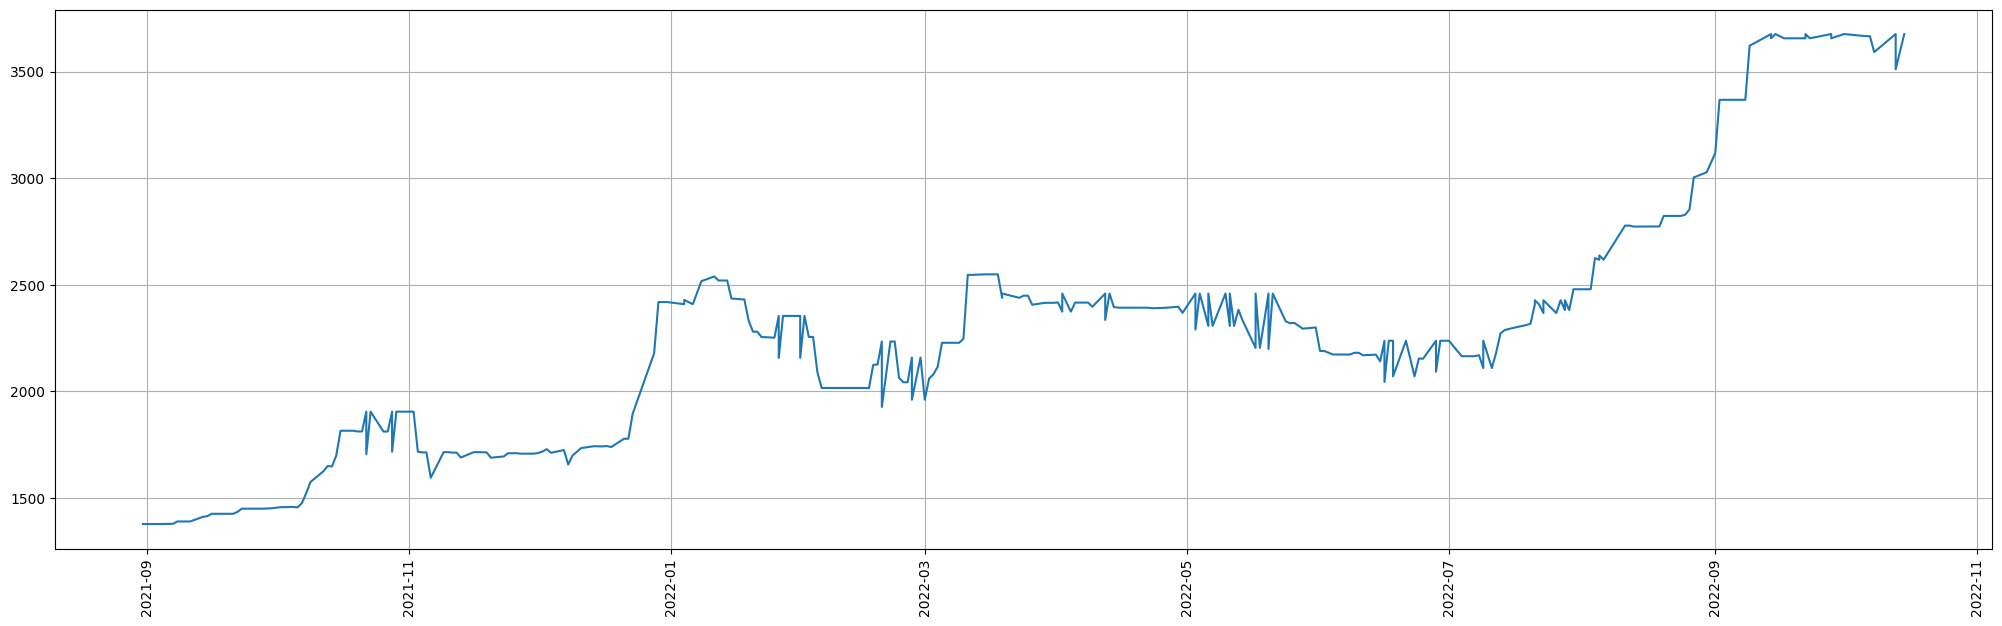

In [27]:
fig = plt.figure(figsize = (25,7))
plt.plot(df_supp['date_valid_from'], df_supp['price_year_eur'])
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [28]:
df_supp = df_supp[['date_valid_from', 'price_year_eur']]
df_supp.head()
df_supp.shape

(279, 2)

In [29]:
df_supp.asfreq('D', method='pad')

TypeError: Cannot compare dtypes int64 and datetime64[ns]